# Looking at The New York Times Covid-19 data

The New York Times Covid-19 data is updated as more cases emerge etc. These data files were collected on March 31st 2020, and cover data up until March 30th 2020.

The data covers US states and counties.

## Import stuff

In [78]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

## Read in the data

In [79]:
counties = pd.read_csv('./us-counties.csv')

In [80]:
states = pd.read_csv('./us-states.csv')

## What does the data look like?

fips code = Federal Information Processing Standards code.
It is used to identify states and counties. 

Note from The New York Times: "In some instances, we report data from multiple counties or other non-county geographies as a single county. For instance, we report a single value for New York City, comprising the cases for New York, Kings, Queens, Bronx and Richmond Counties. In these instances the FIPS code field will be empty."

### Counties

In [81]:
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [82]:
counties.shape

(21799, 6)

In [83]:
counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 6 columns):
date      21799 non-null object
county    21799 non-null object
state     21799 non-null object
fips      21464 non-null float64
cases     21799 non-null int64
deaths    21799 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1021.9+ KB


Comment: After an initial look the data looks pretty stright forward. We have som missng fips. But that has The New York Times already commented on. 

### States

In [84]:
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [85]:
states.shape

(1554, 5)

In [86]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 5 columns):
date      1554 non-null object
state     1554 non-null object
fips      1554 non-null int64
cases     1554 non-null int64
deaths    1554 non-null int64
dtypes: int64(3), object(2)
memory usage: 60.8+ KB


In [87]:
states['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

Comment: After an initial look the data looks pretty stright forward. 

## Group and filter the data

### Counties

In [88]:
### Look and see what states that has all or less counties infected...

### States

In [89]:
states['state'].nunique()

55

All 50 states and all 5 protectorates seem to have Covid-19 cases.

In [90]:
states.head(20)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [91]:
states.tail(20)

,date,state,fips,cases,deaths
1534,2020-03-30,North Dakota,38,109,3
1535,2020-03-30,Northern Mariana Islands,69,2,0
1536,2020-03-30,Ohio,39,1933,40
1537,2020-03-30,Oklahoma,40,481,17
1538,2020-03-30,Oregon,41,606,16
1539,2020-03-30,Pennsylvania,42,4156,48
1540,2020-03-30,Puerto Rico,72,174,6
1541,2020-03-30,Rhode Island,44,408,4
1542,2020-03-30,South Carolina,45,925,18
1543,2020-03-30,South Dakota,46,101,1


It looks like the data shows cases for a specifik date. Not number of new cases or change. Really good to know. 

In [92]:
# Development of total of number of cases in New York state
new_york = states[states['state']== 'New York']
new_york 

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
338,2020-03-06,New York,36,44,0
369,2020-03-07,New York,36,89,0
404,2020-03-08,New York,36,106,0
440,2020-03-09,New York,36,142,0
478,2020-03-10,New York,36,173,0


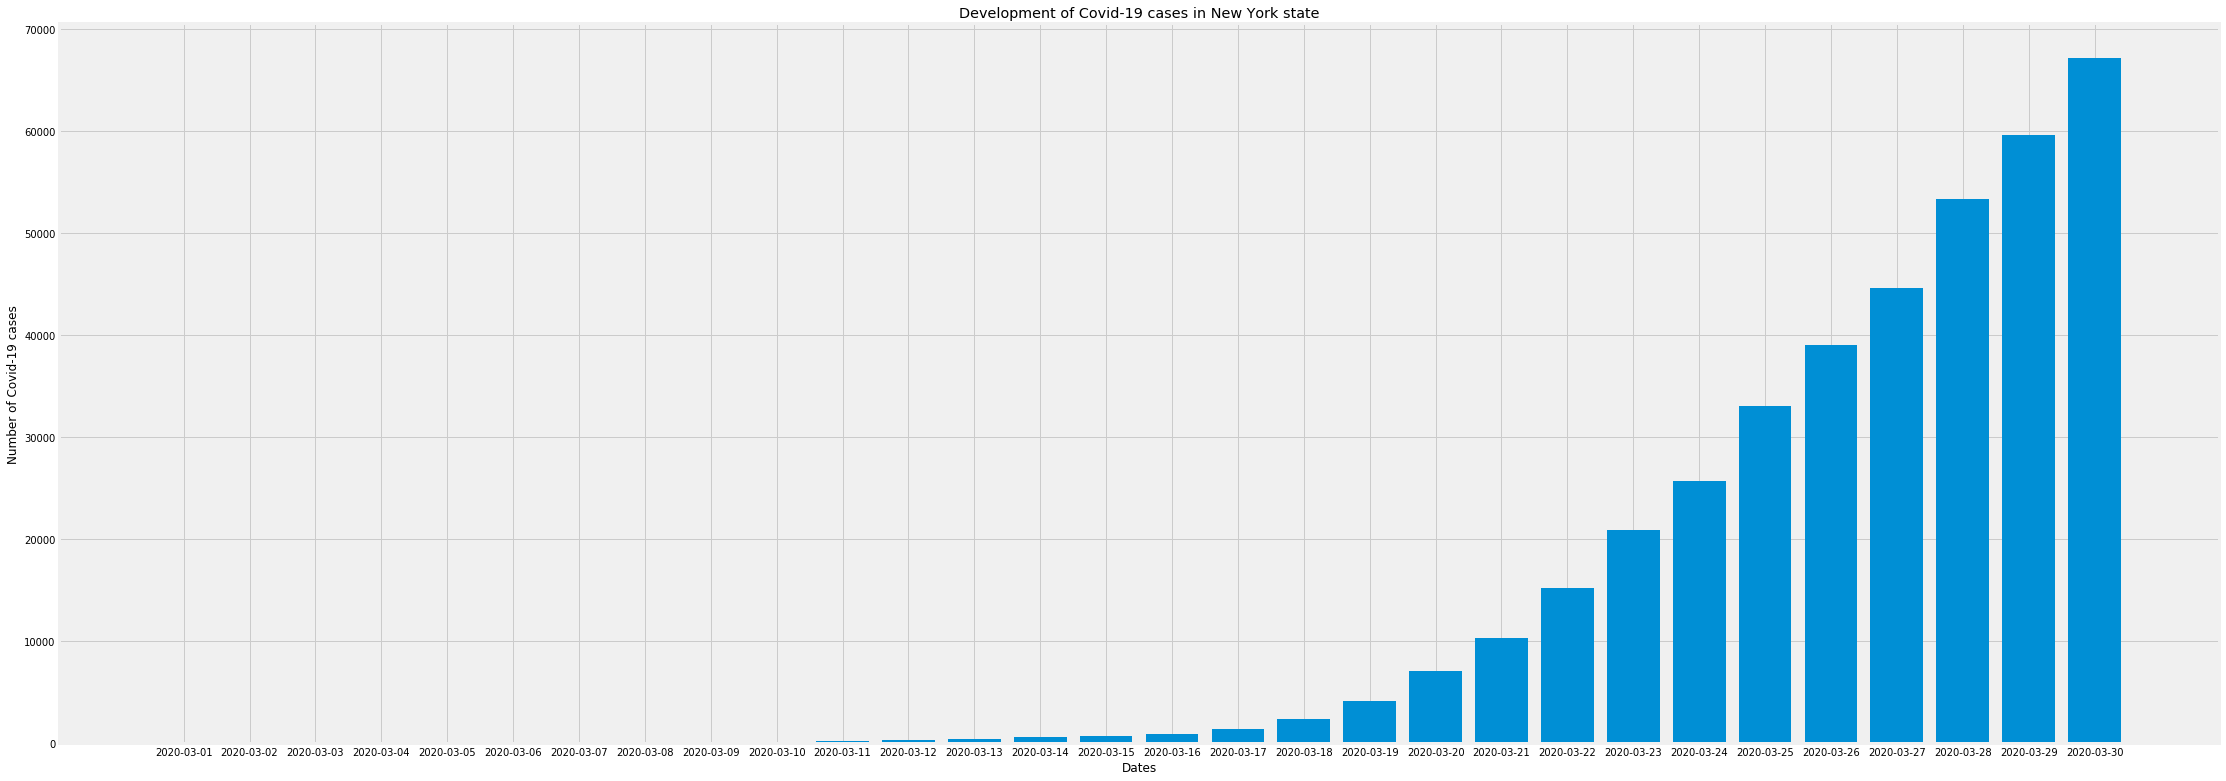

In [99]:
# Viz - Development for Covid-19 cases in New York state
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
date = new_york['date']
cases = new_york['cases']
ax.bar(date,cases)
ax.set_ylabel('Number of Covid-19 cases')
ax.set_xlabel('Dates')
ax.set_title('Development of Covid-19 cases in New York state')
plt.show()

In [95]:
# Development for new Covid-19 cases in New York state
new_york.loc[:,'new cases'] = new_york['cases'].diff()
new_york

,date,state,fips,cases,deaths,new cases
246,2020-03-01,New York,36,1,0,NaN
261,2020-03-02,New York,36,1,0,0.0
276,2020-03-03,New York,36,2,0,1.0
293,2020-03-04,New York,36,11,0,9.0
313,2020-03-05,New York,36,22,0,11.0
338,2020-03-06,New York,36,44,0,22.0
369,2020-03-07,New York,36,89,0,45.0
404,2020-03-08,New York,36,106,0,17.0
440,2020-03-09,New York,36,142,0,36.0
478,2020-03-10,New York,36,173,0,31.0


In [96]:
new_york.dtypes

date          object
state         object
fips           int64
cases          int64
deaths         int64
new cases    float64
dtype: object

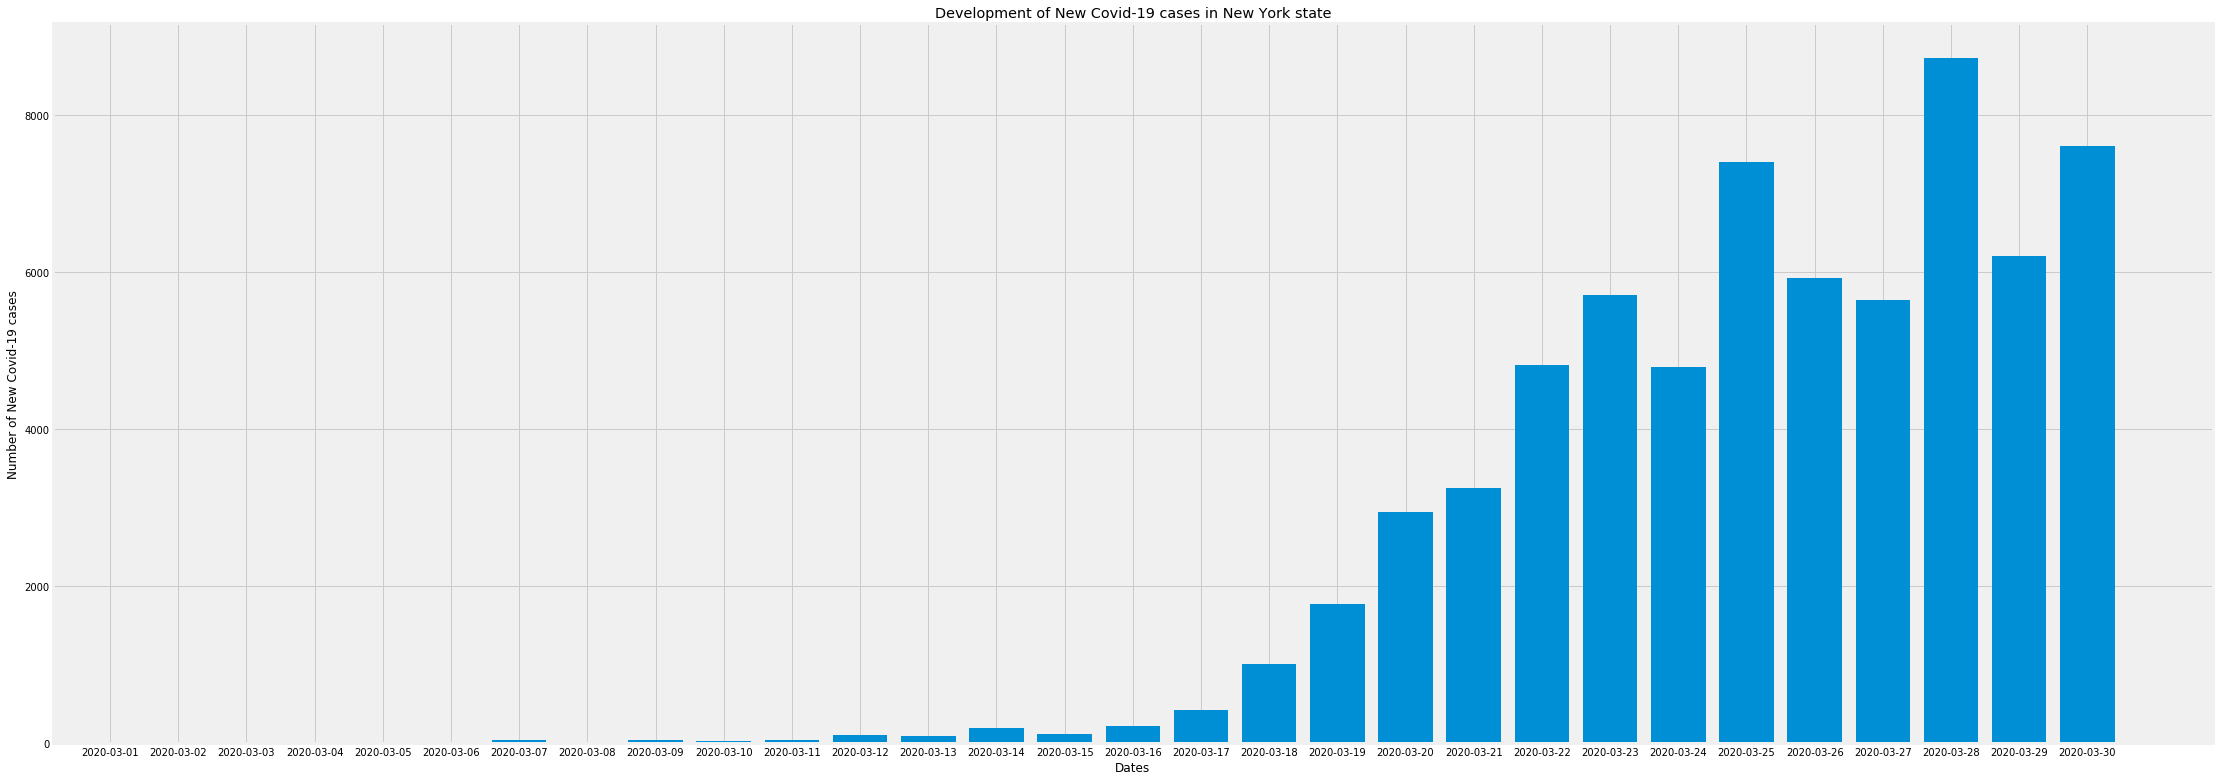

In [100]:
# Viz - Development for new Covid-19 cases in New York state
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
date = new_york['date']
cases = new_york['new cases']
ax.bar(date,cases)
ax.set_ylabel('Number of New Covid-19 cases')
ax.set_xlabel('Dates')
ax.set_title('Development of New Covid-19 cases in New York state')
plt.show()

In [ ]:
# development for Covid-19 deaths in New York state